In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics import tsaplots
from matplotlib import pyplot as plt

In [34]:
prices = pd.read_csv("../data/sell_prices_afcs2023.csv")
calendar = pd.read_pickle("../data/transformed_calendar.pkl")

In [35]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,TX_3,FOODS_3_001,11101,2.28
1,TX_3,FOODS_3_001,11102,2.28
2,TX_3,FOODS_3_001,11103,2.28
3,TX_3,FOODS_3_001,11104,2.28
4,TX_3,FOODS_3_001,11105,2.28


In [36]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185260 entries, 0 to 185259
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   store_id    185260 non-null  object 
 1   item_id     185260 non-null  object 
 2   wm_yr_wk    185260 non-null  int64  
 3   sell_price  185260 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [37]:
prices.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [38]:
prices.describe()

,wm_yr_wk,sell_price
count,185260.000000,185260.000000
mean,11382.207557,2.849929
std,149.397577,1.755746
min,11101.000000,0.020000
25%,11245.000000,1.880000
50%,11411.000000,2.500000
75%,11517.000000,3.500000
max,11621.000000,19.480000


In [39]:
prices.store_id.value_counts()

store_id
TX_3    185260
Name: count, dtype: int64

### Majority of items occur over 250 times in the dataset, but there are other that occur much less frequently - they might be newly added products?

In [50]:
sns.set_theme(style='white', font_scale=1)

<Axes: xlabel='count', ylabel='Count'>

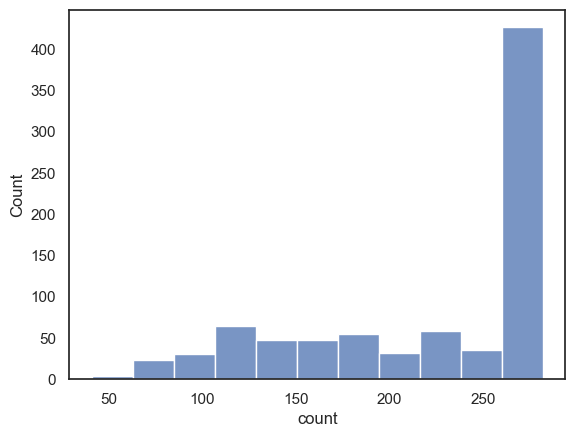

In [51]:
prices_items = prices.item_id.value_counts().reset_index()
sns.histplot(prices_items['count'])

### Adding Datetime info

In [52]:
calendar_prices = prices.merge(calendar, on=["wm_yr_wk"], how='inner')

In [53]:
calendar_prices.describe()

,wm_yr_wk,sell_price,date,count_events,count_events_not_weekend,count_events_not_weekday,snap_TX_mean,snap_TX_sum
count,185260.000000,185260.000000,185260,185260.000000,185260.000000,185260.000000,185260.000000,185260.000000
mean,11382.207557,2.849929,2014-02-13 05:13:14.774910976,0.594305,0.396783,0.197522,0.329494,2.306461
min,11101.000000,0.020000,2011-01-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11245.000000,1.880000,2012-12-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11411.000000,2.500000,2014-04-13 00:00:00,0.000000,0.000000,0.000000,0.285714,2.000000
75%,11517.000000,3.500000,2015-05-24 00:00:00,1.000000,1.000000,0.000000,0.571429,4.000000
max,11621.000000,19.480000,2016-06-19 00:00:00,3.000000,2.000000,2.000000,0.714286,5.000000
std,149.397577,1.755746,NaN,0.700518,0.568258,0.467209,0.282772,1.979403


### The time periods match between the two datasets

In [54]:
calendar_prices = calendar_prices.set_index("date")

### There is a strong upward trend for the selling price

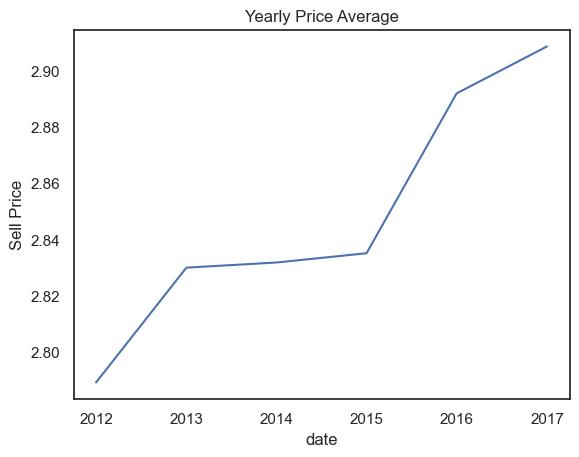

In [55]:
mean_yearly_selling_price = calendar_prices.sell_price.resample("Y").mean()

fig, (ax_1) = plt.subplots(1)
ax_1 = sns.lineplot(mean_yearly_selling_price)
ax_1.set_title("Yearly Price Average")
ax_1.set(ylabel= "Sell Price")
plt.show()

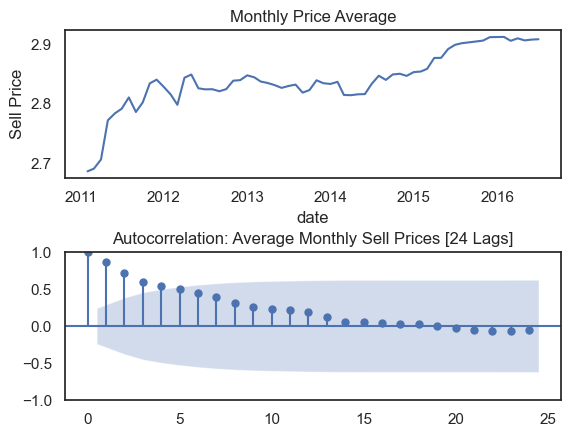

In [61]:
mean_monthly_selling_price = calendar_prices.sell_price.resample("M").mean()

f, (ax1, ax2) = plt.subplots(2, 1)
sns.lineplot(mean_monthly_selling_price, ax=ax1)
tsaplots.plot_acf(calendar_prices.sell_price.resample("M").mean(), lags=24, ax=ax2)
ax1.set_title("Monthly Price Average")
ax1.set(ylabel= "Sell Price")
ax2.set_title("Autocorrelation: Average Monthly Sell Prices [24 Lags]")
plt.subplots_adjust(hspace=0.5)
plt.show()

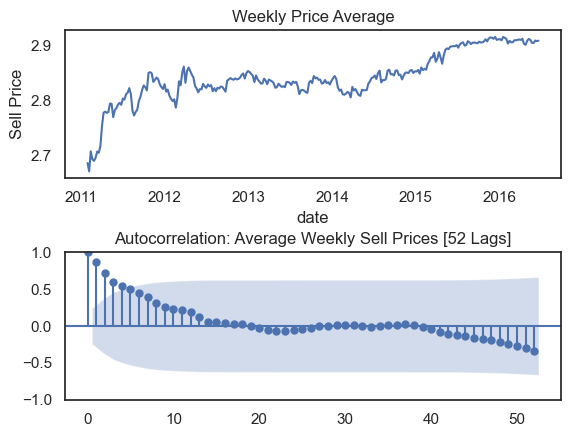

In [62]:
mean_monthly_selling_price = calendar_prices.sell_price.resample("W").mean()

f, (ax1, ax2) = plt.subplots(2, 1)
sns.lineplot(mean_monthly_selling_price, ax=ax1)
tsaplots.plot_acf(calendar_prices.sell_price.resample("M").mean(), lags=52, ax=ax2)
ax1.set_title("Weekly Price Average")
ax1.set(ylabel= "Sell Price")
ax2.set_title("Autocorrelation: Average Weekly Sell Prices [52 Lags]")
plt.subplots_adjust(hspace=0.5)
plt.show()

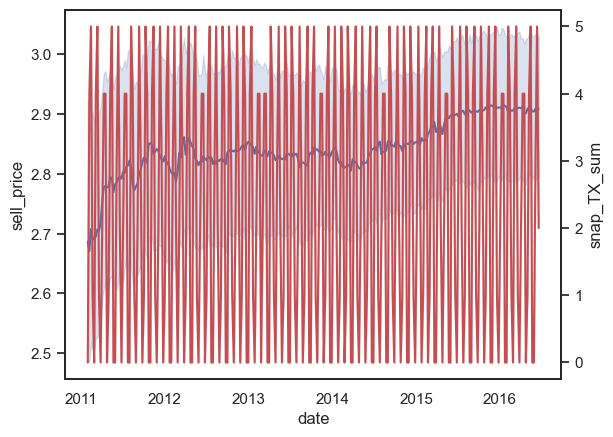

In [67]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='sell_price', data=calendar_prices, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='date', y='snap_TX_sum', data=calendar_prices, ax=ax2, color='r')
plt.show()

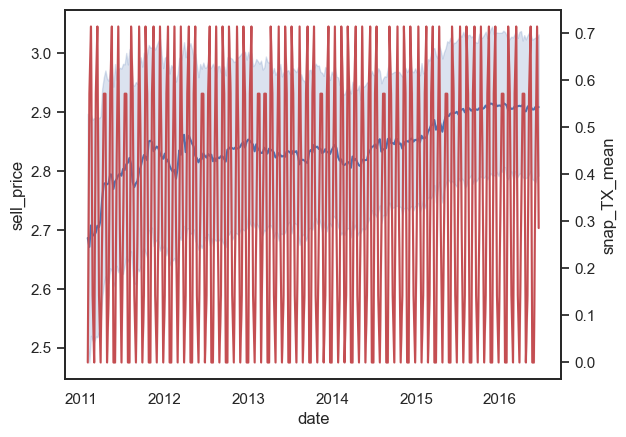

In [68]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='sell_price', data=calendar_prices, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='date', y='snap_TX_mean', data=calendar_prices, ax=ax2, color='r')
plt.show()

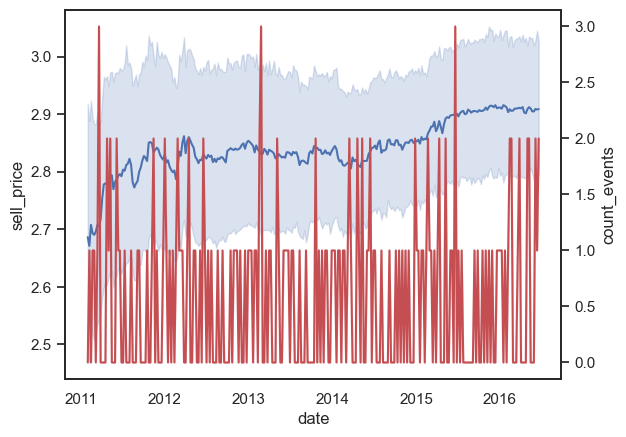

In [69]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='sell_price', data=calendar_prices, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='date', y='count_events', data=calendar_prices, ax=ax2, color='r')
plt.show()

In [70]:
prices.item_id

0         FOODS_3_001
1         FOODS_3_001
2         FOODS_3_001
3         FOODS_3_001
4         FOODS_3_001
             ...     
185255    FOODS_3_827
185256    FOODS_3_827
185257    FOODS_3_827
185258    FOODS_3_827
185259    FOODS_3_827
Name: item_id, Length: 185260, dtype: object